## Leitura inicial do dataset

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns

dataset = pd.read_csv('LifeExpectancyData.csv')

dataset.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol_consumption,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,incidents_hiv,gdp_per_capita,population,thinness_10_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Contando linhas e colunas:

In [123]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol_consumption              2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  polio               

## Correções iniciais
Os valores de expectativa de vida serão os mais importantes na nossa análise, então começamos retirando os países que não têm dados nessa coluna

Contando valores nulos a serem corrigidos:

In [124]:
dataset.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol_consumption                194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under_five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
incidents_hiv                        0
gdp_per_capita                     432
population                         652
thinness_10_19_years                34
thinness_5_9_years                  34
income_composition_of_resources    167
schooling                          147
dtype: int64

Existem 10 linhas que não possuem o valor da expectativa de vida

In [125]:
## mostrar linhas com life expentacy nulo
null_life_expectancy = dataset[dataset['life_expectancy'].isnull()]
null_life_expectancy

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol_consumption,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,incidents_hiv,gdp_per_capita,population,thinness_10_19_years,thinness_5_9_years,income_composition_of_resources,schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


Analisando melhor, esses países que não possuem valor de expectativa de vida contém registros de apenas 1 ano, e por serem poucos, decidimos retirá-los da base de dados

In [126]:
# remover as linhas que tem life expectancy NaN
dataset = dataset.dropna(subset=['life_expectancy'])
print(dataset[dataset['life_expectancy'].isnull()])

Empty DataFrame
Columns: [country, year, status, life_expectancy, adult_mortality, infant_deaths, alcohol_consumption, percentage_expenditure, hepatitis_b, measles, bmi, under_five_deaths, polio, total_expenditure, diphtheria, incidents_hiv, gdp_per_capita, population, thinness_10_19_years, thinness_5_9_years, income_composition_of_resources, schooling]
Index: []

[0 rows x 22 columns]


Substituindo os índices de desenvolvimento por valores booleanos, para facilitar visualização:

In [127]:
dataset['status'].unique()

##trocas developing e developed por true e false
dataset['status'] = dataset['status'].replace('Developing', True)
dataset['status'] = dataset['status'].replace('Developed', False)
dataset.rename(columns={'status':'developed'}, inplace=True)

dataset['developed'].unique()


array([ True, False])

In [128]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2928 non-null   object 
 1   year                             2928 non-null   int64  
 2   developed                        2928 non-null   bool   
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2928 non-null   int64  
 6   alcohol_consumption              2735 non-null   float64
 7   percentage_expenditure           2928 non-null   float64
 8   hepatitis_b                      2375 non-null   float64
 9   measles                          2928 non-null   int64  
 10  bmi                              2896 non-null   float64
 11  under_five_deaths                2928 non-null   int64  
 12  polio               

Para nosso trabalho, decidimos excluir alguns dos dados no nosso dataset, que julgamos como inúteis.

In [129]:
dataset.drop(['thinness_10_19_years', 'thinness_5_9_years', 'income_composition_of_resources', 'percentage_expenditure', 'total_expenditure', 'population'], axis=1, inplace=True)

In [130]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              2928 non-null   object 
 1   year                 2928 non-null   int64  
 2   developed            2928 non-null   bool   
 3   life_expectancy      2928 non-null   float64
 4   adult_mortality      2928 non-null   float64
 5   infant_deaths        2928 non-null   int64  
 6   alcohol_consumption  2735 non-null   float64
 7   hepatitis_b          2375 non-null   float64
 8   measles              2928 non-null   int64  
 9   bmi                  2896 non-null   float64
 10  under_five_deaths    2928 non-null   int64  
 11  polio                2909 non-null   float64
 12  diphtheria           2909 non-null   float64
 13  incidents_hiv        2928 non-null   float64
 14  gdp_per_capita       2501 non-null   float64
 15  schooling            2784 non-null   f

## Adicionando regiões no dataset
Com o csv "region.csv" conseguimos adicionar as regiões de cada país no nosso dataset

In [131]:
regions = pd.read_csv('region.csv')

regions['region'].unique()

array(['Rest of Europe', 'Central America and Caribbean', 'Oceania',
       'Africa', 'Asia', 'European Union', 'Middle East', 'South America',
       'North America'], dtype=object)

In [132]:
# merge entre dataset e regions
dataset = pd.merge(dataset, regions, on='country', how='left')

In [133]:
# verificar países com região nula
null_region = dataset[dataset['region'].isnull()]['country'].unique()
null_region

array(['Bolivia (Plurinational State of)', "Côte d'Ivoire",
       "Democratic People's Republic of Korea", 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Republic of Korea',
       'Republic of Moldova', 'Slovakia', 'South Sudan', 'Sudan',
       'Swaziland', 'The former Yugoslav republic of Macedonia', 'Turkey',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of America',
       'Viet Nam'], dtype=object)

In [134]:
# adicionar as regiões em países com região nula com base no array null_region
dataset.loc[dataset['country'] == 'Bolivia (Plurinational State of)', 'region'] = 'South America'
dataset.loc[dataset['country'] == 'Côte d\'Ivoire', 'region'] = 'Africa'
dataset.loc[dataset['country'] == 'Democratic People\'s Republic of Korea', 'region'] = 'Asia'
dataset.loc[dataset['country'] == 'Kyrgyzstan', 'region'] = 'Asia'
dataset.loc[dataset['country'] == 'Lao People\'s Democratic Republic', 'region'] = 'Asia'
dataset.loc[dataset['country'] == 'Republic of Korea', 'region'] = 'Asia'
dataset.loc[dataset['country'] == 'Republic of Moldova', 'region'] = 'Rest of Europe'
dataset.loc[dataset['country'] == 'Slovakia', 'region'] = 'Rest of Europe'
dataset.loc[dataset['country'] == 'South Sudan', 'region'] = 'Africa'
dataset.loc[dataset['country'] == 'Sudan', 'region'] = 'Africa'
dataset.loc[dataset['country'] == 'Swaziland', 'region'] = 'Africa'
dataset.loc[dataset['country'] == 'The former Yugoslav republic of Macedonia', 'region'] = 'Rest of Europe'
dataset.loc[dataset['country'] == 'Turkey', 'region'] = 'Asia'
dataset.loc[dataset['country'] == 'United Kingdom of Great Britain and Northern Ireland', 'region'] = 'European Union' # era da uniao europeia quando foi coletado o dado
dataset.loc[dataset['country'] == 'United Republic of Tanzania', 'region'] = 'Africa'
dataset.loc[dataset['country'] == 'United States of America', 'region'] = 'North America'
dataset.loc[dataset['country'] == 'Viet Nam', 'region'] = 'Asia'

# recontar países com região nula
dataset[dataset['region'].isnull()]['country'].unique()

array([], dtype=object)

## Correção de dados nulos
A correção dos dados nulos será feita por substituição pela média da região

In [135]:
# contar valores nulos de cada coluna
dataset.isnull().sum()

country                  0
year                     0
developed                0
life_expectancy          0
adult_mortality          0
infant_deaths            0
alcohol_consumption    193
hepatitis_b            553
measles                  0
bmi                     32
under_five_deaths        0
polio                   19
diphtheria              19
incidents_hiv            0
gdp_per_capita         427
schooling              144
region                   0
dtype: int64

In [136]:
# pegar nomes das colunas com valores nulos
null_columns = dataset.columns[dataset.isnull().any()]
null_columns

Index(['alcohol_consumption', 'hepatitis_b', 'bmi', 'polio', 'diphtheria',
       'gdp_per_capita', 'schooling'],
      dtype='object')

In [137]:
# computa mediana da região (agrupando também por desenvolvido ou não) das colunas com valores nulos  
# e cria um pair com o nome da coluna e a mediana

median_by_region = {}
for column in null_columns:
    median_by_region[column] = dataset.groupby(['region', 'developed'])[column].median()
median_by_region 

{'alcohol_consumption': region                         developed
 Africa                         True          1.505
 Asia                           False         2.080
                                True          1.530
 Central America and Caribbean  True          5.690
 European Union                 False        11.005
                                True          9.250
 Middle East                    False         2.530
                                True          0.540
 North America                  False         8.630
                                True          6.480
 Oceania                        False         9.530
                                True          0.880
 Rest of Europe                 False         9.610
                                True          6.130
 South America                  True          6.045
 Name: alcohol_consumption, dtype: float64,
 'hepatitis_b': region                         developed
 Africa                         True         84.0
 Asi

In [138]:
# substitui os valores nulos pela mediana da região e se é desenvolvido ou não
for column in null_columns:
    for index, row in dataset[dataset[column].isnull()].iterrows():
        dataset.loc[index, column] = median_by_region[column][row['region']][row['developed']]

# verificar se ainda tem valores nulos
dataset.isnull().sum()

country                0
year                   0
developed              0
life_expectancy        0
adult_mortality        0
infant_deaths          0
alcohol_consumption    0
hepatitis_b            0
measles                0
bmi                    0
under_five_deaths      0
polio                  0
diphtheria             0
incidents_hiv          0
gdp_per_capita         0
schooling              0
region                 0
dtype: int64

Pairplot para ajudar na visualização do relacionamento da expectativa de vida com as outras colunas:

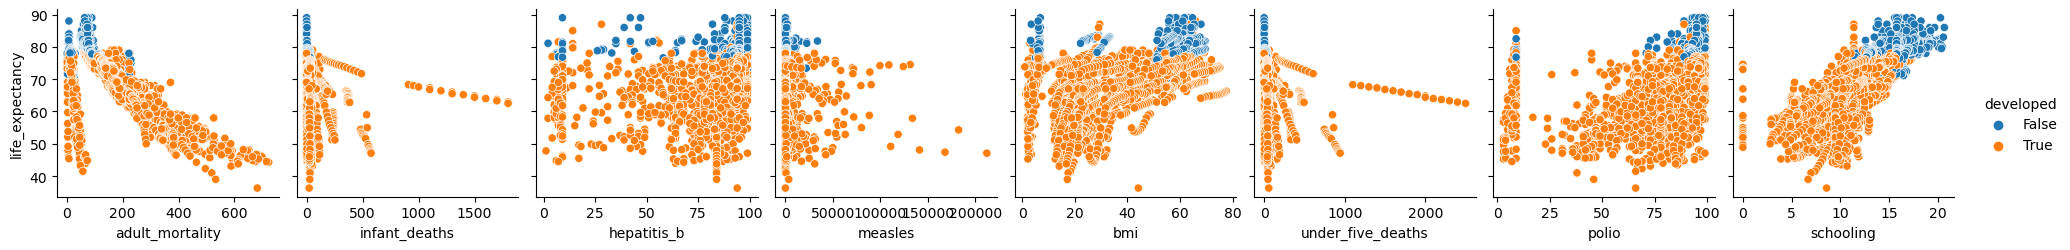

In [139]:
sns.pairplot(dataset, hue='developed', y_vars='life_expectancy', x_vars=['adult_mortality', 'infant_deaths', 'hepatitis_b', 'measles', 'bmi', 'under_five_deaths', 'polio', 'schooling'])


Em escala log:

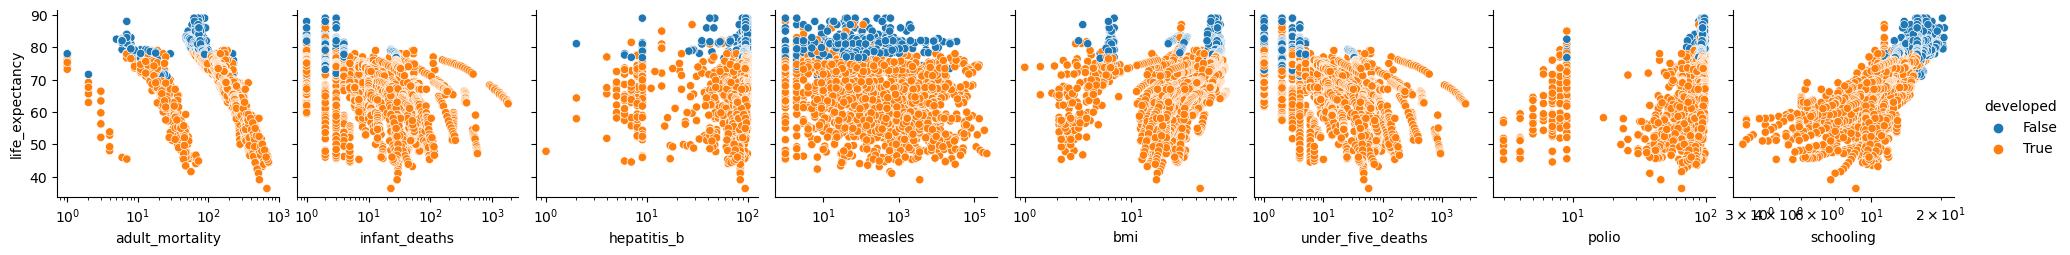

In [140]:
pp = sns.pairplot(dataset, hue='developed', y_vars='life_expectancy', x_vars=['adult_mortality', 'infant_deaths', 'hepatitis_b', 'measles', 'bmi', 'under_five_deaths', 'polio', 'schooling'])
pp.set(xscale='log')